# Librerías

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar datos

In [3]:
path_data = 'D:/GitHub/101MachineLearning/000_data/toy'

# Ruta del archivo CSV
file_path = f"{path_data}/titanic.csv"

# Leer el archivo CSV
titanic_df = pd.read_csv(file_path)

# Ver las primeras filas del conjunto de datos
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Descripción de datos

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                           Name   Sex  Ticket    Cabin Embarked
count            

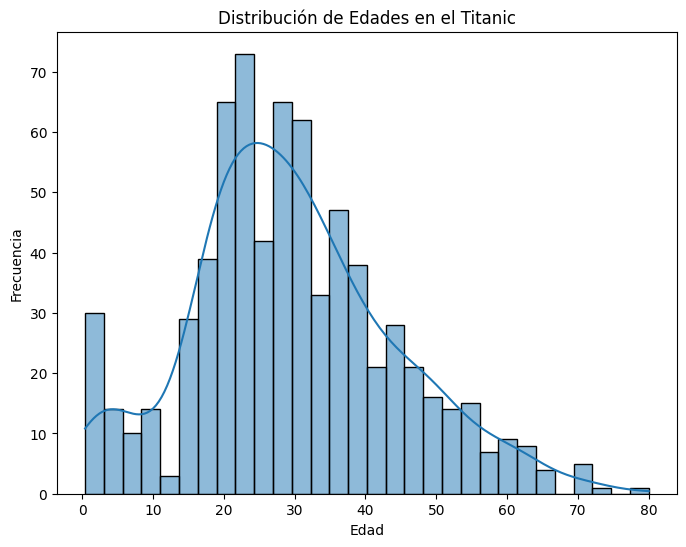

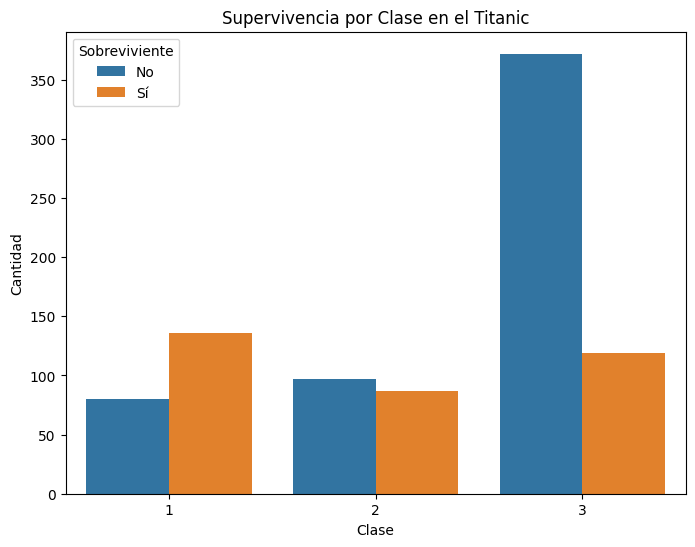

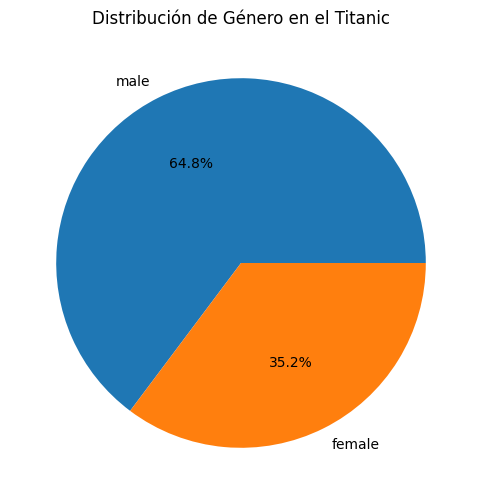

In [ ]:
# Estadísticas descriptivas
print(titanic_df.describe())

# Estadísticas de variables categóricas
print(titanic_df.describe(include=['object']))

# Histogramas de Edades:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades en el Titanic')
plt.show()

# Gráfico de Barras de Supervivencia por Clase:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Supervivencia por Clase en el Titanic')
plt.legend(title='Sobreviviente', labels=['No', 'Sí'])
plt.show()

# Gráfico de Torta de Género:
plt.figure(figsize=(8, 6))
titanic_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Género en el Titanic')
plt.ylabel('')
plt.show()


# Correlación

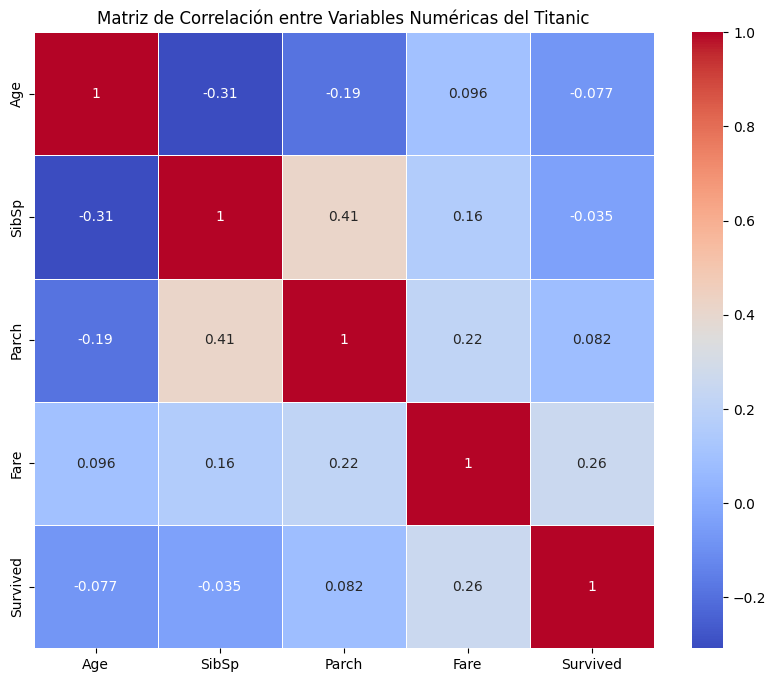

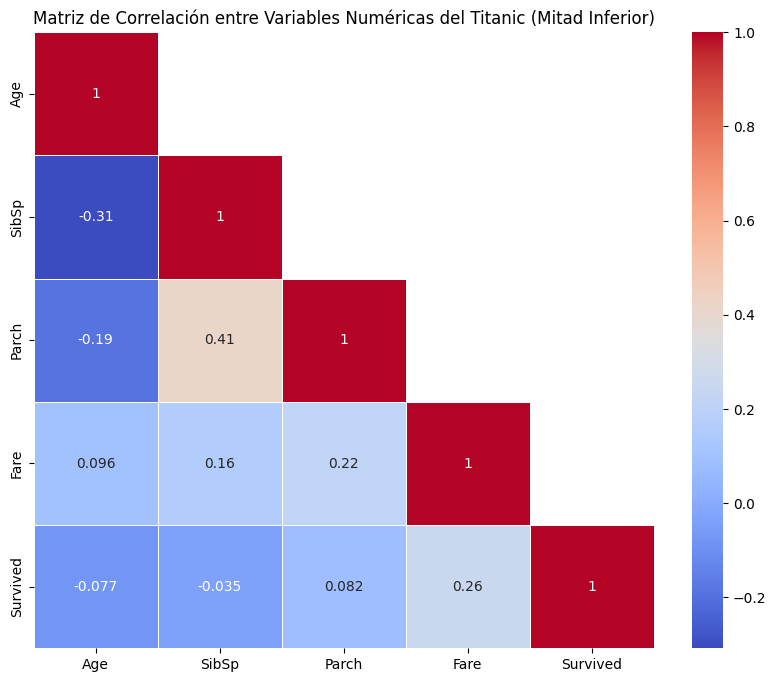

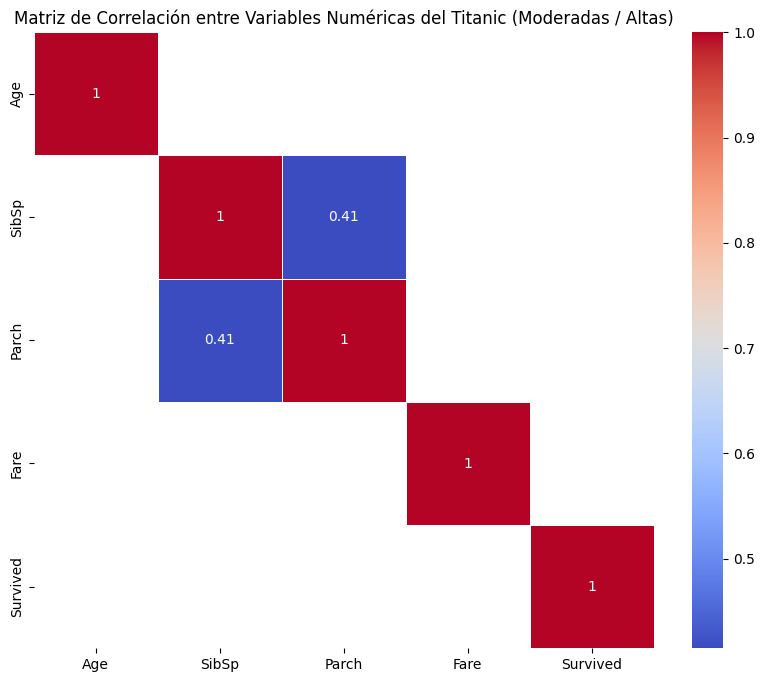

In [9]:
# Análisis de Correlación
# Se podría eliminar aquellas variables que tengan una correlación baja o nula
# con la variable objetivo, ya que podrían no aportar información relevante al modelo.
# Además, se podría quitar ciertas variables que están altamente correlacionadas entre sí.
import numpy as np

# Seleccionar las variables numéricas principales para el análisis de correlación y el target
variables_numericas = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived']

# Crear una submatriz de correlación
correlation_matrix = titanic_df[variables_numericas].corr()

# Crear una máscara para la mitad superior
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

mask_threshold = np.abs(correlation_matrix) < 0.4

# Combinar las máscaras
mask_combined = mask | mask_threshold

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas del Titanic')
plt.show()

# Crear un mapa de calor de correlación con la máscara
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=~mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas del Titanic (Mitad Inferior)')
plt.show()

# Crear un mapa de calor de correlación con la máscara combinada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask_threshold, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas del Titanic (Moderadas / Altas)')
plt.show()

# Diagrama de Cajas

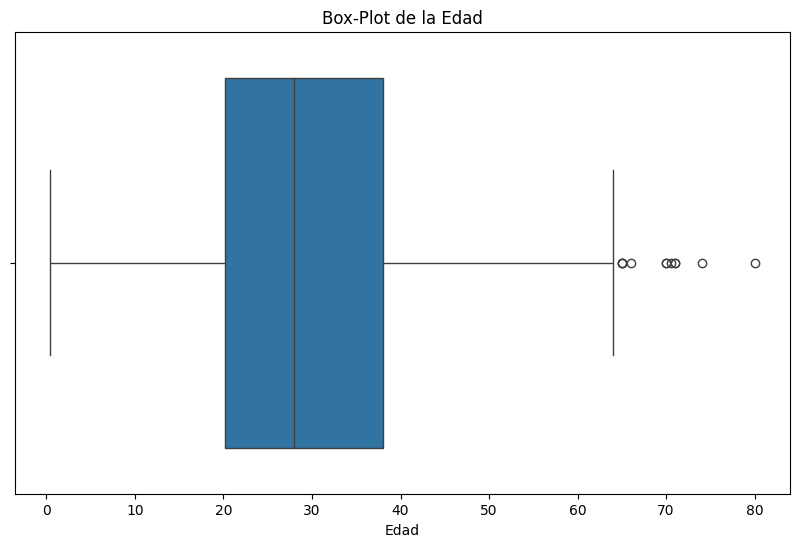

In [ ]:
# Crear el box-plot de la variable "edad"
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic_df['Age'])
plt.title('Box-Plot de la Edad')
plt.xlabel('Edad')
plt.show()